# Fundamentals of Data Analysis
##  Project 2018
### DATE DUE ON/BEFORE 14 DEC 2018

Problem statement

The box plot is common in data analysis for investigating individual numerical variables.
In this project, you will investigate and explain box plots and their uses. The boxplot
function from the Python package matplotlib.pyplot can be used to create box plots.
Your submission should be in the form of a repository containing a Jupyter notebook in
which you detail your findings. In your notebook, you should:

• Summarise the history of the box plot and situations in which it used.

• Demonstrate the use of the box plot using data of your choosing.

• Explain any relevant terminology such as the terms quartile and percentile.

• Compare the box plot to alternatives.


### Started 18 November 2018 by creating the Jupyter Notebook file(s)

## 1.  Summarise the history of the box plot and situations in which it used.

The Box plot.

A man called TUKEY put forward the design of the Box Plot in 1977  [#1]_page_204.

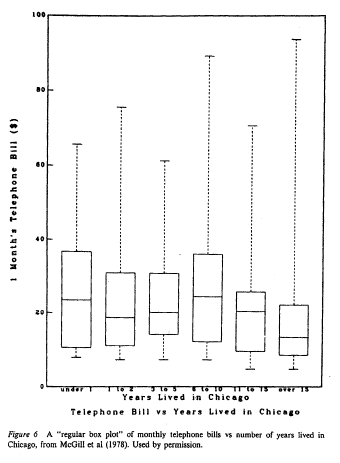

As with any picture, it can be worth a thousand words.
As long as the design of the picture is clearly understandable by those who are expected to see it then it can impart knowledge in a standard way without the use of any written language. The only text required is a description of the numbers it is describing.

His full name was John Wilder Tukey. [#2]  (1915-2000) [#3]

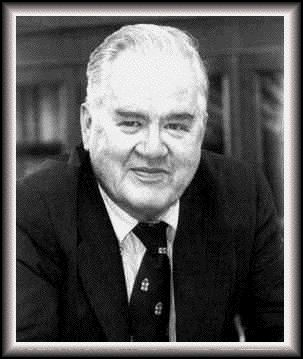

Tukey put forward that 5 important descriptive statistics could be shown by the Box Plot.

Minimum, The lower quartile, the Median, the Upper Quartile and the Maximum.
Another descriptive statistic is the Inter-Quartile Range known as the IQR.
This is a calculation of the Upper Quartile - Lower Quartile.

The box in the middle represents the Lower quartile, the median and the Upper quartile.
Out of the central box extends an upper and lower arm.
The length of the lower arm represents the value difference between the Lower quartile and the minimum value.
The length of the upper arm represents the value difference between the Upper quartile and the maximum value.

During research into the Box-Plot, it was found that Tukey also worked at Bell Labs [#4]. This is noteworthy because Bell Labs has been the source of other quality control theory, calculations and graphs. Another man involved in quality control called Shewart also worked there [#5] and another well known man in quality control called Demming was influenced by Shewart. Demin would later go on to become one of the best known names in Quality Control[#5]. Shewart worked at Bell Labs until 1956 and this included the time when TUKEY was there [#6]. It seems Bell Labs created the atmosphere for many inventions for statistics and quality control.

The box plot can be used whereever numbers ("variables" in Q.C) are used. 
As it is used to describe the descriptive statistics of a series of numbers then whenever the Min,Max,Median can be put as a number then the box plot can be used.
Tukey himself uses the cost of telephone bills over several years in his 1978 graph [#1-page-203].
The box plot can be used as a single graph or a group of box-plots to compare one sub-set of data to another as long as the two sub-sets are related but separated enough so that the comparison is logical and valid.[#7]
for example: comparing the output of 25KG bags of cement off a production line where multiple machines are bagging the cement.
All bags can be measured and graphed, however the output from each machine can be measured and compaed to each other because the machines should all be producing 25KGs and therefore several side-by-side box-plots can be used to compare the min,max,median,Lower and Upper quartiles. And if there is a difference then adjustments to the relevant machine(s) can be made.
Another example would be a comparison of hours of sleep per day. [#9]

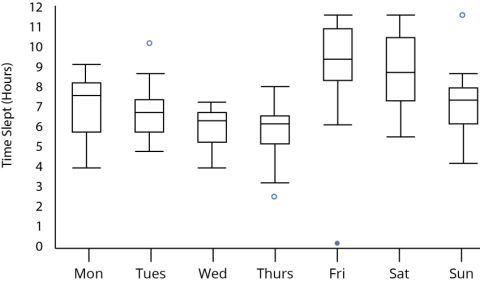

A variation of the box-plot is a notched box-plot where the 'waist' of the box plot is tapered at a certain point where the taper starts represents a confidence interval Median of  the Median +/- 1.58(IQR / SQRT(n) [#8]

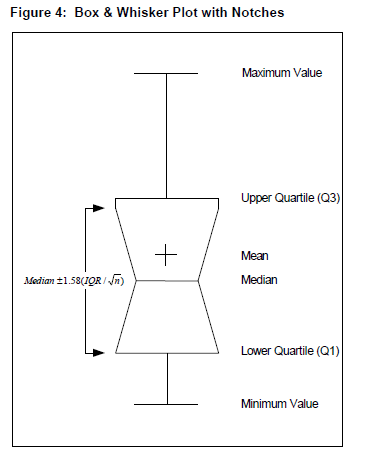

Another modification is the amount of data spanned by the graph.  One school of thought is that all data in included in the graph. Another school is to only represent data points within 1.5 times the IQR from the Lower and Upper quartile values.  This has the effect of making 'unattached' outliers on the graph if they are included in the dataset at al [#10] & [#11].




### References:

[#1] https://onlinelibrary.wiley.com/doi/epdf/10.1002/j.2333-8504.1981.tb01261.x   visited: 20181118  
    'Graphical Data Analysis', Page 204, 2nd paragraph, Wainer & Thissen.

[#2] http://mnstats.morris.umn.edu/introstat/history/w98/Tukey.html   visited: 20181118

[#3] https://www.britannica.com/science/box-and-whisker-plot   visited: 20181118
   
[#4] https://en.wikipedia.org/wiki/Bell_Labs#1940s   visited: 20181118
     
[#5] https://en.wikipedia.org/wiki/Walter_A._Shewhart   visited: 20181118
     
[#6] https://en.wikipedia.org/wiki/John_Tukey   visited: 20181118

[#7] http://asq.org/learn-about-quality/data-collection-analysis-tools/overview/box-whisker-plot.html   visited: 20181118
     
[#8] http://exjansen.com/views/2003/statpharm/st01.pdf   visited: 20181113

[#9] https://plot.ly/static/img/literacy/boxplot/boxplotfig9.jpg   visited: 20181118

[#10] http://www.sfu.ca/~jackd/Stat203_2011/Wk02_1_Full.pdf   visited: 2018118

[#11] https://www.mathworks.com/matlabcentral/cody/problems/42485   visited: 20181119

    

## 2. • Demonstrate the use of the box plot using data of your choosing.


Multiple Box plot


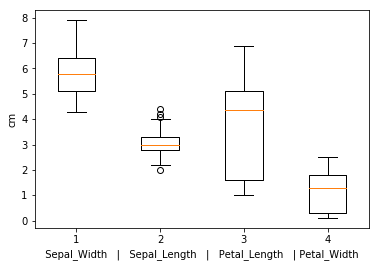

In [1]:
# import the required libraries
import csv

import math

import matplotlib.pyplot as plt

# import functionality for computing some statistics
import statistics


# using the datset form  Fisher's IRIS.CSV
SepalL = [5.1,4.9,4.7,4.6,5,5.4,4.6,5,4.4,4.9,5.4,4.8,4.8,4.3,5.8,5.7,5.4,5.1,5.7,5.1,5.4,5.1,4.6,5.1,4.8,5,5,5.2,5.2,4.7,4.8,5.4,5.2,5.5,4.9,5,5.5,4.9,4.4,5.1,5,4.5,4.4,5,5.1,4.8,5.1,4.6,5.3,5,7,6.4,6.9,5.5,6.5,5.7,6.3,4.9,6.6,5.2,5,5.9,6,6.1,5.6,6.7,5.6,5.8,6.2,5.6,5.9,6.1,6.3,6.1,6.4,6.6,6.8,6.7,6,5.7,5.5,5.5,5.8,6,5.4,6,6.7,6.3,5.6,5.5,5.5,6.1,5.8,5,5.6,5.7,5.7,6.2,5.1,5.7,6.3,5.8,7.1,6.3,6.5,7.6,4.9,7.3,6.7,7.2,6.5,6.4,6.8,5.7,5.8,6.4,6.5,7.7,7.7,6,6.9,5.6,7.7,6.3,6.7,7.2,6.2,6.1,6.4,7.2,7.4,7.9,6.4,6.3,6.1,7.7,6.3,6.4,6,6.9,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9]
SepalW = [3.5,3,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,3.7,3.4,3,3,4,4.4,3.9,3.5,3.8,3.8,3.4,3.7,3.6,3.3,3.4,3,3.4,3.5,3.4,3.2,3.1,3.4,4.1,4.2,3.1,3.2,3.5,3.1,3,3.4,3.5,2.3,3.2,3.5,3.8,3,3.8,3.2,3.7,3.3,3.2,3.2,3.1,2.3,2.8,2.8,3.3,2.4,2.9,2.7,2,3,2.2,2.9,2.9,3.1,3,2.7,2.2,2.5,3.2,2.8,2.5,2.8,2.9,3,2.8,3,2.9,2.6,2.4,2.4,2.7,2.7,3,3.4,3.1,2.3,3,2.5,2.6,3,2.6,2.3,2.7,3,2.9,2.9,2.5,2.8,3.3,2.7,3,2.9,3,3,2.5,2.9,2.5,3.6,3.2,2.7,3,2.5,2.8,3.2,3,3.8,2.6,2.2,3.2,2.8,2.8,2.7,3.3,3.2,2.8,3,2.8,3,2.8,3.8,2.8,2.8,2.6,3,3.4,3.1,3,3.1,3.1,3.1,2.7,3.2,3.3,3,2.5,3,3.4,3]
PetalL = [1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,1.7,1.5,1.7,1.5,1,1.7,1.9,1.6,1.6,1.5,1.4,1.6,1.6,1.5,1.5,1.4,1.5,1.2,1.3,1.5,1.3,1.5,1.3,1.3,1.3,1.6,1.9,1.4,1.6,1.4,1.5,1.4,4.7,4.5,4.9,4,4.6,4.5,4.7,3.3,4.6,3.9,3.5,4.2,4,4.7,3.6,4.4,4.5,4.1,4.5,3.9,4.8,4,4.9,4.7,4.3,4.4,4.8,5,4.5,3.5,3.8,3.7,3.9,5.1,4.5,4.5,4.7,4.4,4.1,4,4.4,4.6,4,3.3,4.2,4.2,4.2,4.3,3,4.1,6,5.1,5.9,5.6,5.8,6.6,4.5,6.3,5.8,6.1,5.1,5.3,5.5,5,5.1,5.3,5.5,6.7,6.9,5,5.7,4.9,6.7,4.9,5.7,6,4.8,4.9,5.6,5.8,6.1,6.4,5.6,5.1,5.6,6.1,5.6,5.5,4.8,5.4,5.6,5.1,5.1,5.9,5.7,5.2,5,5.2,5.4,5.1]
PetalW = [0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,0.3,0.3,0.2,0.4,0.2,0.5,0.2,0.2,0.4,0.2,0.2,0.2,0.2,0.4,0.1,0.2,0.1,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0.2,0.6,0.4,0.3,0.2,0.2,0.2,0.2,1.4,1.5,1.5,1.3,1.5,1.3,1.6,1,1.3,1.4,1,1.5,1,1.4,1.3,1.4,1.5,1,1.5,1.1,1.8,1.3,1.5,1.2,1.3,1.4,1.4,1.7,1.5,1,1.1,1,1.2,1.6,1.5,1.6,1.5,1.3,1.3,1.3,1.2,1.4,1.2,1,1.3,1.2,1.3,1.3,1.1,1.3,2.5,1.9,2.1,1.8,2.2,2.1,1.7,1.8,1.8,2.5,2,1.9,2.1,2,2.4,2.3,1.8,2.2,2.3,1.5,2.3,2,2,1.8,2.1,1.8,1.8,1.8,2.1,1.6,1.9,2,2.2,1.5,1.4,2.3,2.4,1.8,1.8,2.1,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2,2.3,1.8]

# setup a temp set
tempary = []

# put the data to be graphed into the temp set
tmpary = []
tmpary.append(SepalL)
tmpary.append(SepalW)
tmpary.append(PetalL)
tmpary.append(PetalW)

# setup the labels for the axes of the graph
plt.xlabel("  Sepal_Width   |   Sepal_Length   |   Petal_Length   | Petal_Width  ")
plt.ylabel('cm')

# print a title for the graph
print("Multiple Box plot")

# plot the graph
plt.boxplot(tmpary)

# show the graph
plt.show()  


## 3. Explain any relevant terminology such as the terms quartile and percentile.

The 5 main aspects of the Box Plot are.
1. The median
This is the centre value of all the values (with repetition) when laid out in a row of rising value.
If the number of values was 11 then there would be 5 values before the median and 5 values after the median.
If the number is even then the value of the median is the average of the two values either side of the centre.

2. The Maximum
This is the maximum value encountered. 
Again there are two schools of thought.  The first, that the maximum value is the value shown at the upper arm of the graph from the dataset. The second, is that the value depicted by the top of the upper arm is the maximum value encountered that is within 1.5 times the IQR.
The IQR being the value of the Upper quartile minus the value of the Lower quartile.

3. The Minimum
This is the minimum value encountered. 
Again there are two schools of thought.  The first, that the minimum value is the value shown at the lower arm of the graph from the dataset. The second, is that the value depicted by the bottom of the lower arm is the minimum value encountered that is within 1.5 times the IQR.
The IQR being the value of the Upper quartile minus the value of the Lower quartile.

4. the Lower Quartile
This is the value when all the values are laid out ina row of increasing value.
25% along this row of values lies the Lower quartile value.  If the Lower Quartile mark lies between two actual values then the average of the two values either side is the lower quartile.

5. the Upper Quartile
This is the value when all the values are laid out ina row of increasing value.
75% along this row of values lies the Upper Quartile.
If the Upper Quartile mark lies between two actual values then the average of the two values either side is the Upper Quartile.

A sixth one is 
6. Outlier(s)
If the graph follows the second school of thought [#1] about ignoring the values outside the (1.5 IQR + Upper_quartile) and (Lower_quartile - 1.5 X IQR)  limits then any value encountered outside that range is treated as a value but only marked by some simple datamark e.g. an X or a circle. The upper or lower arm of the box plot does not take in these values.


And example of a graph with multiple box-plots showing outliers as circles.

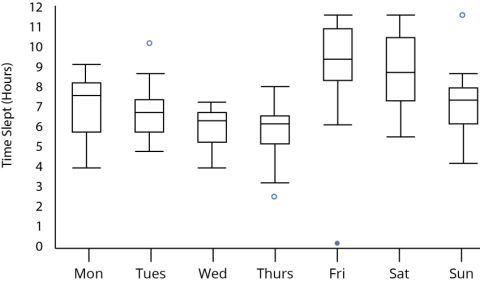


## REFERENCES:
[#1] https://www.mathworks.com/matlabcentral/cody/problems/42485
     visited: 20181119


## 4 • Compare the box plot to alternatives.
One possible but long-winded replacement might be a scatter chart where there are 5 "dots" in a vertical or horizontal line
Each plotted list would need to have its '5 descriptive stats' calculated.

The Scatter plot is the closest I have found so far.

I thought of the "Stacked Bar chart" but this needs lots of agile coding to make the first bar ''white'' so that it doesn't appear on the screen 9assuming the background colour is also white, this is so that the first real bar sits on top of it with a visible colour ( red, green, blue etc) .
In theory this will work but it is al ot of coding to do somethiign that is only a few lines to do with the boxplot() function.

The code below shows the code needed to generate 4 equivalent scatter plots to show the same descriptive statsitics as the boxplot would show.

SCATTER DIAGRAM showing the 5 Box-plot key values
Dots represent:
MAX: Maximum
75Q: Upper Quartile
MED: Median
25Q: Lower Quartile
MIN: Minimum


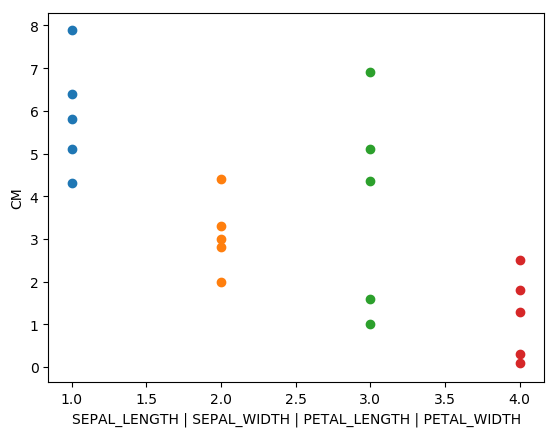

In [2]:
# code to create somethign simialr to the boxplot to display the 5 significant parameters in a box plot.
import statistics
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()

# index for the x-axis of the scatter plot
xidx = 0


# this section is repeated for each incoming list of values
# so it should be made into a stand-alone function
xaxis = []
tmpmed = 0
tmp25q = 0
tmp75q = 0
tmpmin = 0
tmpmax = 0
# now calculate the 5 key boxplot values
tmpary = SepalL
tmplen = len(tmpary)
tmpmax = max(tmpary)
tmp75q = np.percentile(tmpary,75)
tmpmed = statistics.median(tmpary)
tmp25q = np.percentile(tmpary,25)
tmpmin = min(tmpary)
# pepare two lists for use in the scatter plot
xidx = xidx + 1
xaxis = [xidx,xidx,xidx,xidx,xidx]
fivestats = [tmpmin,tmp25q,tmpmed,tmp75q,tmpmax]
# draw the scatter plot
plt.scatter(xaxis,fivestats)        

# now calculate the 5 key boxplot values
tmpary = SepalW
tmplen = len(tmpary)
tmpmax = max(tmpary)
tmp75q = np.percentile(tmpary,75)
tmpmed = statistics.median(tmpary)
tmp25q = np.percentile(tmpary,25)
tmpmin = min(tmpary)
# pepare two lists for use in the scatter plot
xidx = xidx + 1
xaxis = [xidx,xidx,xidx,xidx,xidx]
fivestats = [tmpmin,tmp25q,tmpmed,tmp75q,tmpmax]
# draw the scatter plot
plt.scatter(xaxis,fivestats)        

# now calculate the 5 key boxplot values
tmpary = PetalL
tmplen = len(tmpary)
tmpmax = max(tmpary)
tmp75q = np.percentile(tmpary,75)
tmpmed = statistics.median(tmpary)
tmp25q = np.percentile(tmpary,25)
tmpmin = min(tmpary)
# pepare two lists for use in the scatter plot
xidx = xidx + 1
xaxis = [xidx,xidx,xidx,xidx,xidx]
fivestats = [tmpmin,tmp25q,tmpmed,tmp75q,tmpmax]
# draw the scatter plot
plt.scatter(xaxis,fivestats)        

# now calculate the 5 key boxplot values
tmpary = PetalW
tmplen = len(tmpary)
tmpmax = max(tmpary)
tmp75q = np.percentile(tmpary,75)
tmpmed = statistics.median(tmpary)
tmp25q = np.percentile(tmpary,25)
tmpmin = min(tmpary)
# pepare two lists for use in the scatter plot
xidx = xidx + 1
xaxis = [xidx,xidx,xidx,xidx,xidx]
fivestats = [tmpmin,tmp25q,tmpmed,tmp75q,tmpmax]
# draw the scatter plot
plt.scatter(xaxis,fivestats)        

# add axis labels
plt.xlabel('SEPAL_LENGTH | SEPAL_WIDTH | PETAL_LENGTH | PETAL_WIDTH')
plt.ylabel('CM')

print("SCATTER DIAGRAM showing the 5 Box-plot key values")
print("Dots represent:")
print("MAX: Maximum")
print("75Q: Upper Quartile")
print("MED: Median")
print("25Q: Lower Quartile")
print("MIN: Minimum")
# show the scatter plot on the screen
plt.show()

## references:
# https://stackoverflow.com/questions/2374640/how-do-i-calculate-percentiles-with-python-numpy
# visited: 20181119
# How to obtain specific quartile from a dataset

# https://stackoverflow.com/questions/21397549/stack-bar-plot-in-matplotlib-and-add-label-to-each-section-and-suggestions
# visisted: 20181119
# how to plot a horizontal bar chart

### 2018-11-18
### After some research, I found two plots called BEANPLOT and VOILINPLOT
### They appear to be "curvy versions" of the box-plot.
### But it seems that there is no implementation of either in PYTHON (yet)
### They are available in R

LOG
19-Nov-2018
Difficulty in embedding pictures after uploading to GITHUB
